In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Set plot style for consistent visualization
sns.set_style("whitegrid")

The following data set was retreived from a collection of data on kaggle.com called "Formula 1 World Championship (1950 - 2023)". The file used is called lap_times.csv, which measures all the laptimes set in Formula One up until 2023, whilst also measuring the raceId, driverId, lap number, and the time duration in milliseconds of the lap. The reason why this dataset is so important is because it provides detailed insights into the performance of Formula 1 drivers across multiple decades. The dataset can help identify trends in lap times, determine the impact of various factors on race outcomes, and track the progression of driver and team performances over time. In the world of Formula One, data is everything. It influences race performance, speed, strategy, day-to-day operations, and even important decision-making like contracts. Lap-times are a performance metric that is especially important as they can determine a team's relative performance level in comparison to their rivals. This is especially important since these teams consist of hundreds, if not thousands, of the highest level engineers, strategists, and engineers in the world, having to utilize and process millions of pieces of data at the highest operational level in the world in order to succeed on a competitive scale. The problem that teams are always trying to solve is how can they finish the races as soon as possible. For the stake-holders, in this case being the teams, engineers, and drivers, this lap time dataset presents massive benefit because it provides insight into their peak performance, consistency, finishing rate, and speed, all of which can be used and improved upon based on this dataset to more effectively and efficently solve the problem. I personally am motivated and invested in analyzing a data-set like this because oftentimes, people suggest that racing is easy because all you're doing is sitting and driving a car, but the vast data entries and the way they can be applied in something like this act as proof that those conceptions are far from the truth.

In [2]:
#Load the dataset into a Pandas DataFrame from the uploaded file
data = pd.read_csv("lap_times.csv")

#Display the first few rows to understand the structure of the data
data.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


This piece of code reads the data file, converts it to a pandas data frame, and then shows the head to demonstrate that the lap_times.csv file was successfully read and loaded.

In [3]:
# Check for missing values in each column
missing_data = data.isnull().sum()
print("Missing values per column:\n", missing_data)

# Remove rows with any NaN values
data = data.dropna()

# Check the data types after removing NaN values
print("Data types after removing NaN values:\n", data.dtypes)

# Ensure 'milliseconds' is an integer
data['milliseconds'] = data['milliseconds'].astype(int)

# Display general information about the cleaned DataFrame
data.info()

Missing values per column:
 raceId          0
driverId        0
lap             0
position        0
time            0
milliseconds    0
dtype: int64
Data types after removing NaN values:
 raceId           int64
driverId         int64
lap              int64
position         int64
time            object
milliseconds     int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551742 entries, 0 to 551741
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        551742 non-null  int64 
 1   driverId      551742 non-null  int64 
 2   lap           551742 non-null  int64 
 3   position      551742 non-null  int64 
 4   time          551742 non-null  object
 5   milliseconds  551742 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 25.3+ MB


This bit of code cleans up the data, checking for any missing entries as well as showing the data types for each of the columns in the data frame.

Question 1: How do laptimes change throughout a race for each driver?

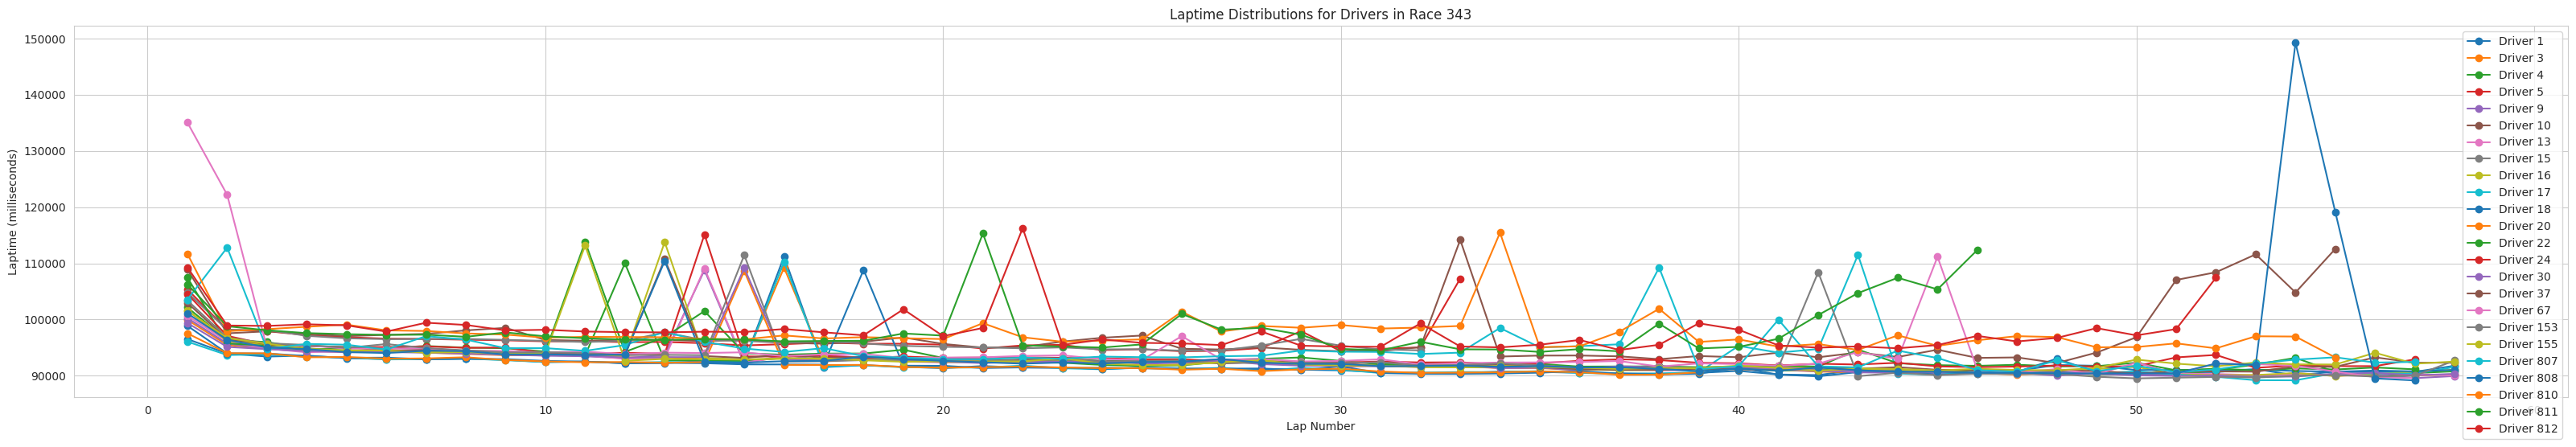

In [5]:
import random  # To select a random race ID

# Choose a random unique race ID
unique_race_ids = data['raceId'].unique()
random_race_id = random.choice(unique_race_ids)

# Filter the dataset for this race
race_data = data[data['raceId'] == random_race_id]

# Group by driverId and get the lap times for each driver
driver_laptimes = race_data.groupby('driverId')['milliseconds'].apply(list)

# Plot the laptimes for each driver in this race
plt.figure(figsize=(40, 6))
for driver_id, laptimes in driver_laptimes.items():
    plt.plot(range(1, len(laptimes) + 1), laptimes, marker='o', label=f"Driver {driver_id}")

plt.title(f"Laptime Distributions for Drivers in Race {random_race_id}")
plt.xlabel("Lap Number")
plt.ylabel("Laptime (milliseconds)")
plt.grid(True)
plt.legend()
plt.show()

This graphs tend to show that the laptimes are mostly consistent amongst the drivers with a few spikes in time and anomolies that can be attributed to things such as mandatory pit-stops where the cars must change tyres, race starts where the cars start from the grid and thus have slower times, an intervention of the safety car or virtual safety car which requires all cars to slow down at a reduced pace, or things such as mechanical failurs and crashes which can cause a massive spike and then for the dot to stop due to the lap not being completed and the driver retiring fromt the race. A graph like this is pivotal to the problem which the teams are trying to solve in finishing the races as quickly as possible, because what can be inferred from the spread of drivers through these races is that consistency throughout the race is required to finish the races as quickly as possible. From this data and that conclusion, strategists will be benefit by building their scenario models and tire/fuel strategies based on enabling the driver to have the most consistent lap times as possible across the duration of the race.

Question 2: Which driver has the most fastest laps?

Driver with the most fastest laps: 1
Number of fastest laps: 62


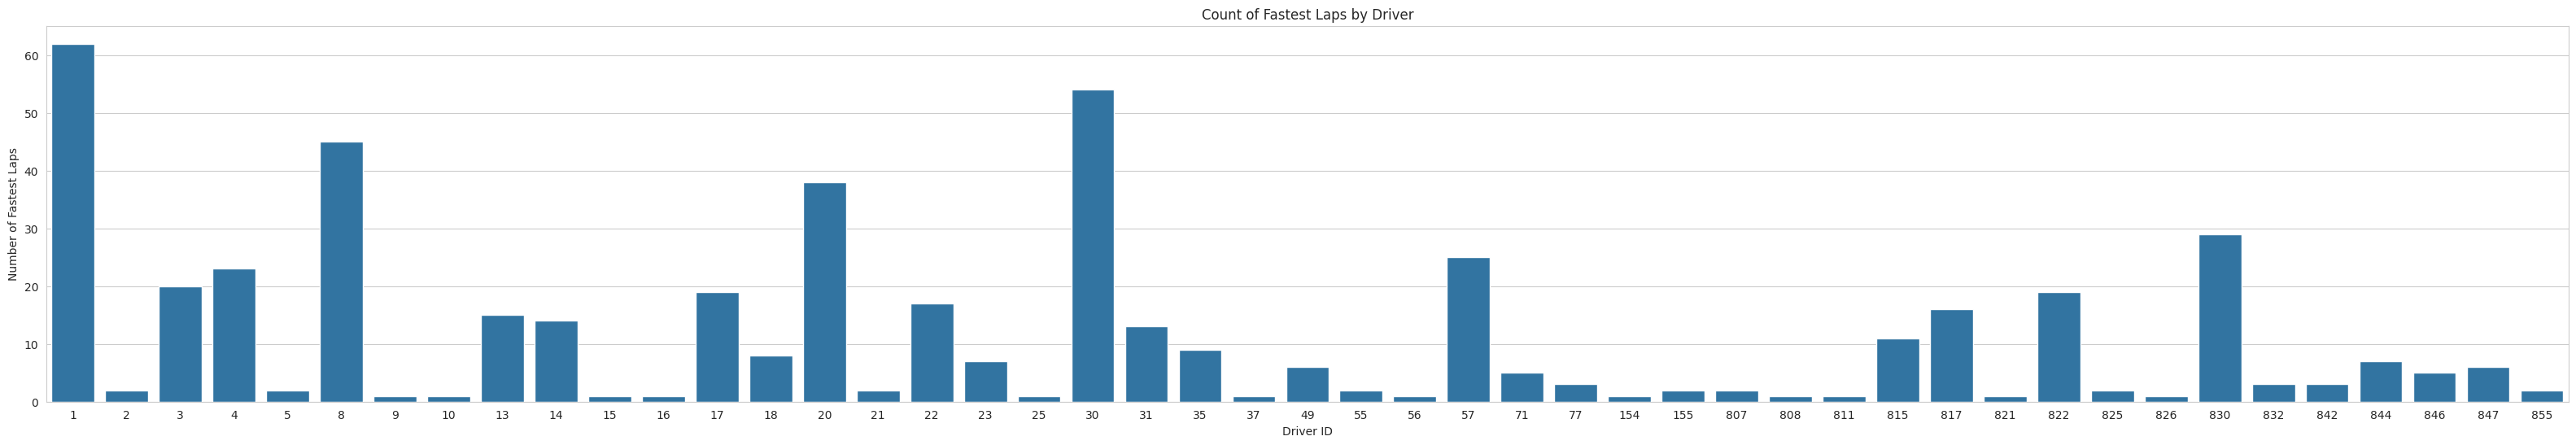

In [6]:
#Find the driver with the fastest lap in each race
fastest_lap_per_race = data.loc[data.groupby('raceId')['milliseconds'].idxmin()]

#Count the number of times each driver has recorded the fastest lap
fastest_laps_count = fastest_lap_per_race['driverId'].value_counts()

#Display the driver with the most fastest laps
fastest_driver = fastest_laps_count.idxmax()

#Return the results
print("Driver with the most fastest laps:", fastest_driver)
print("Number of fastest laps:", fastest_laps_count[fastest_driver])

#Optional: Plot the count of fastest laps for each driver
plt.figure(figsize=(40, 6))
sns.barplot(x=fastest_laps_count.index, y=fastest_laps_count.values)
plt.title("Count of Fastest Laps by Driver")
plt.xlabel("Driver ID")
plt.ylabel("Number of Fastest Laps")
plt.show()

The graph shows that driver 1 has the most fastest laps over the span of measured races, followed by driver 30 and driver 8. This is another important statistic in terms being part of solving the problem of how quickly the cars can finish the races as it analyzes the drivers' performance over the span of measured races in a way that determines which driver(s) have the most occurances in which they are the fastest driver of the race. If a driver can be the fastest consistently through a career, then teams can have faith in them during a season that they can perform, which makes it easier for strategists and engineers because they require less contingincies in their planning to have the fastest way of finishing the race, because a driver is able to be fast on more occasions than anyone else. On the other hand, a driver with very few fastest laps is an indication that they may not have the overall peak performance, and so teams may have to accomodate for that by being aggressive with their strategies and taking risks that have less basis in the data in order to try and advance their race position and somehow find a miraculous way to reduce their race finishing time.

Question 3: Which driver has the most consistent lap times?

Driver with the most consistent lap times: 72
Standard deviation of lap times for this driver: 2630.987258994096


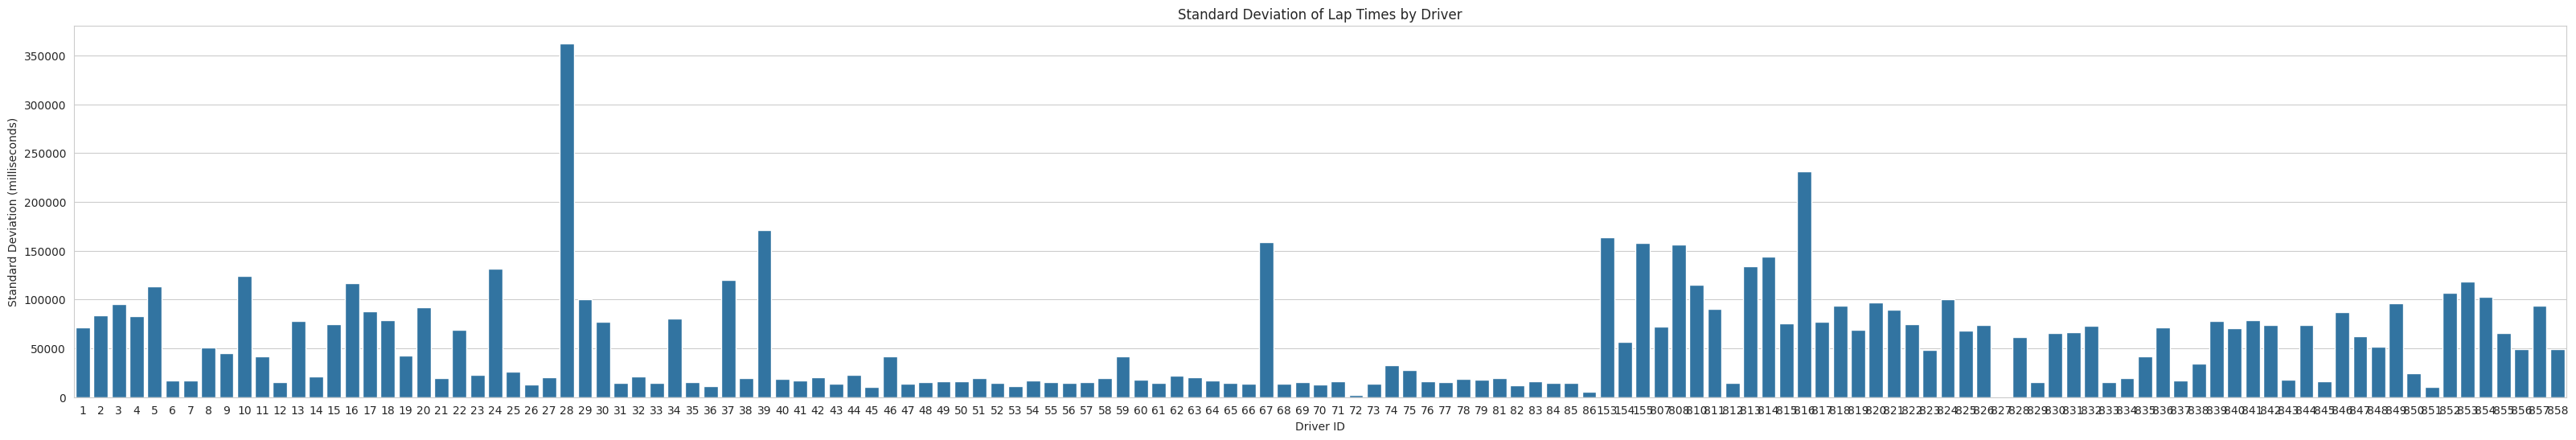

In [7]:
#Group by driverId and calculate the standard deviation of their lap times
laptime_std_per_driver = data.groupby('driverId')['milliseconds'].std()

#Find the driver with the lowest standard deviation, indicating high consistency
most_consistent_driver = laptime_std_per_driver.idxmin()

#Display the results
print("Driver with the most consistent lap times:", most_consistent_driver)
print("Standard deviation of lap times for this driver:", laptime_std_per_driver[most_consistent_driver])

#Plot the standard deviation of lap times for each driver
plt.figure(figsize=(40, 6))
sns.barplot(x=laptime_std_per_driver.index, y=laptime_std_per_driver.values)
plt.title("Standard Deviation of Lap Times by Driver")
plt.xlabel("Driver ID")
plt.ylabel("Standard Deviation (milliseconds)")
plt.show()

This shows that during the races, driver 72 has the most consistent laptimes throughout the races by virtue of having the smallest standard deviation of lap times. This is an important statistic when it comes to solving the overarching problem of how to make the cars finish the races as quickly as possible because it means a variety of things. When developing the car, having a more consistent driver means they can provide more consistent feedback about the feeling and speed of the car. When teams are making strategies, a more consistent driver will enable the scenario and planning models to be more accurate. Meanwhile a less consistent driver with more peaks and troughs in form will make development harder as their feedback is subject to more variation and strategies will have to be more frequently adjusted to account for the variance in lap times. All in all, the consistency in lap times is crucial in benefitting the team in going faster because it enables them to develop and operate with more consistency.

Question 4: Do lap times tend to improve or worsen as a race progresses?

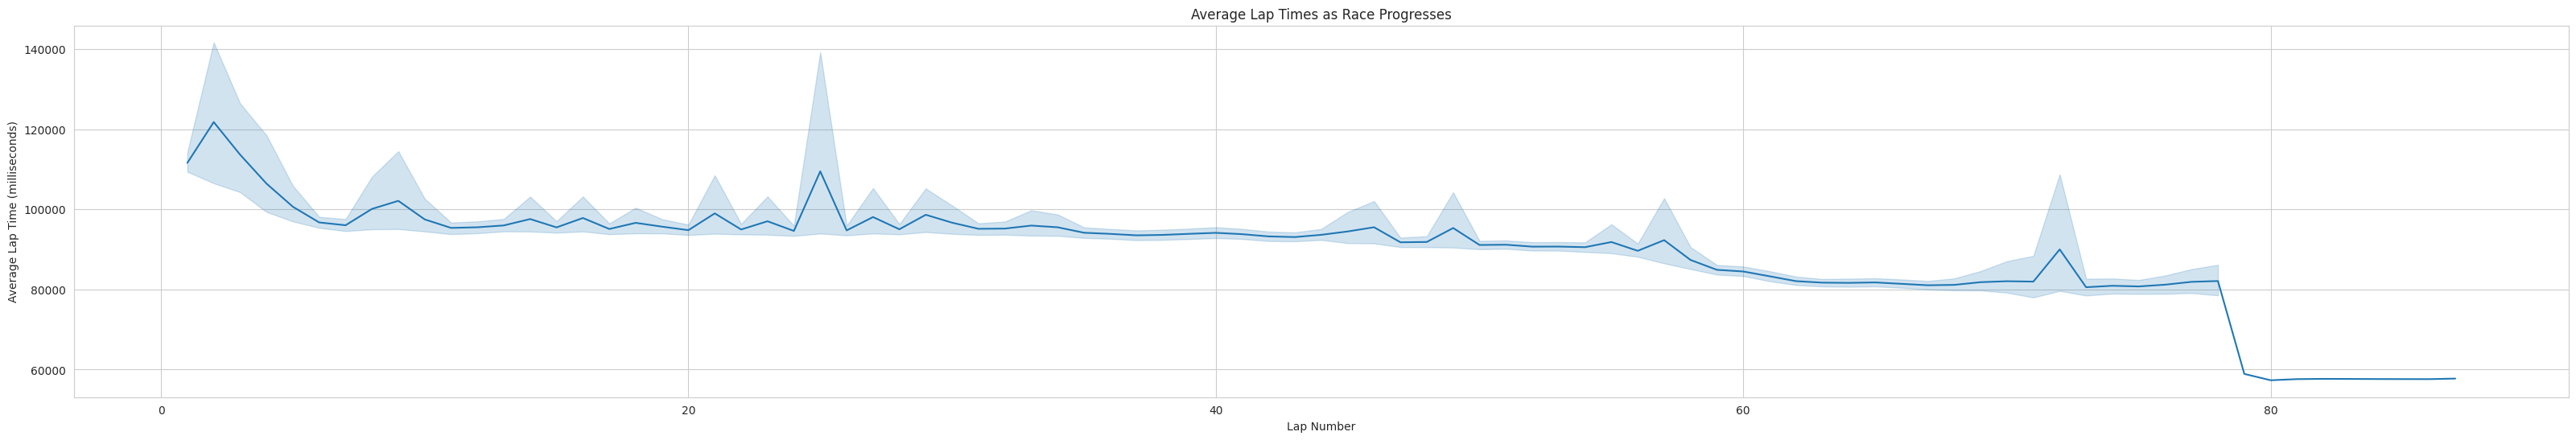

In [12]:
# Group by raceId and lap to calculate the average lap times across all races
average_laptime_per_lap = data.groupby(['raceId', 'lap'])['milliseconds'].mean()

# Plot the average lap times for each lap to visualize the trend
plt.figure(figsize=(40, 6))
sns.lineplot(x=average_laptime_per_lap.index.get_level_values('lap'), 
             y=average_laptime_per_lap.values)
plt.title("Average Lap Times as Race Progresses")
plt.xlabel("Lap Number")
plt.ylabel("Average Lap Time (milliseconds)")
plt.show()

This graph shows that laptimes decrease and improve over the course of a race on average. This trend is important in solving the problem of how the teams can make the cars finish the races as fast as possible, as it demonstrates that more speed in lap times comes at the end of the races than it does at the beginning. It means that teams will often optimize their strategies based on this data and trend to give their drivers the freshest, fastest tires are the end of the races when possible such that they can finish out the race strongly when the car is meant to be at its fastest. On the contrary, it could also mean teams prioritize running faster, fresher tire compounds at the beginning of the race to make up the defiict in time at the beginning of the races and advance positions on track. Both of which are different approaches that could be taken based on a driver's position which are also based in the trend of the data, all in attempt of finishing the race in the shortest time that is possible.

Question 5: How does the position in a race affect laptime?

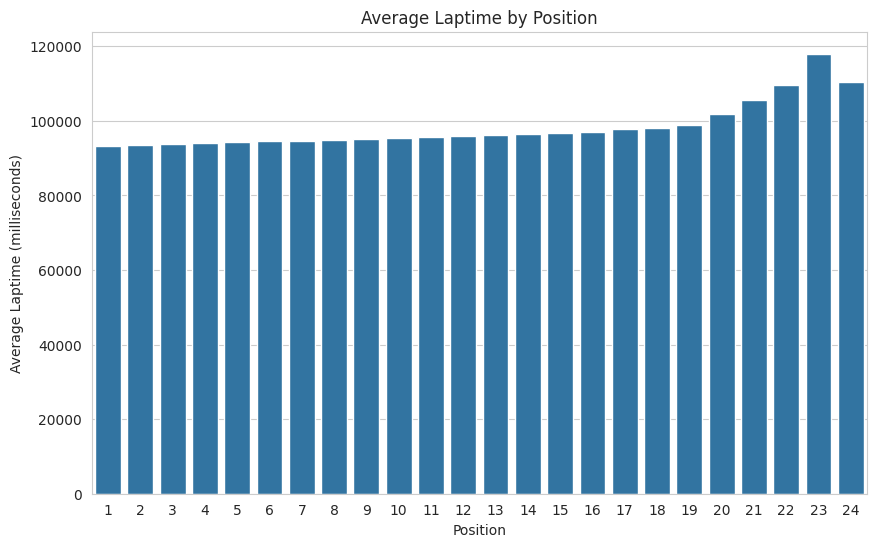

In [14]:
#Calculate the average laptime for each position
average_laptime_per_position = data.groupby('position')['milliseconds'].mean()

#Plot the average laptime for each position
plt.figure(figsize=(10, 6))
sns.barplot(x=average_laptime_per_position.index, y=average_laptime_per_position.values)
plt.title("Average Laptime by Position")
plt.xlabel("Position")
plt.ylabel("Average Laptime (milliseconds)")
plt.show()

This graph shows that the higher the position of a driver, the faster their laptimes will be compared to their competition, with the only anomaly being in 23rd and 24th places where 23rd has slower average lap times than 24th. This statistic shows that being in front is often conducive to finishing the race in the fastest time by being able to set the fastest laps. Teams find benefit in this as it could lead them to prioritize taking track position, whether it be by ensuring they qualify higher up, take less pit stops than a rival, or take an aggressive early strategy to advance position and then try to defend on wearing tires against the competition, all depending on the situation of position the team or driver finds themselves in. All of this ultimately helps to solve the problem, as the higher up you finish often correlates to a shorter overall race time.

Question 6: Which driver has completed the most laps?

Driver who has completed the most laps: 4
Total laps completed by this driver: 19879


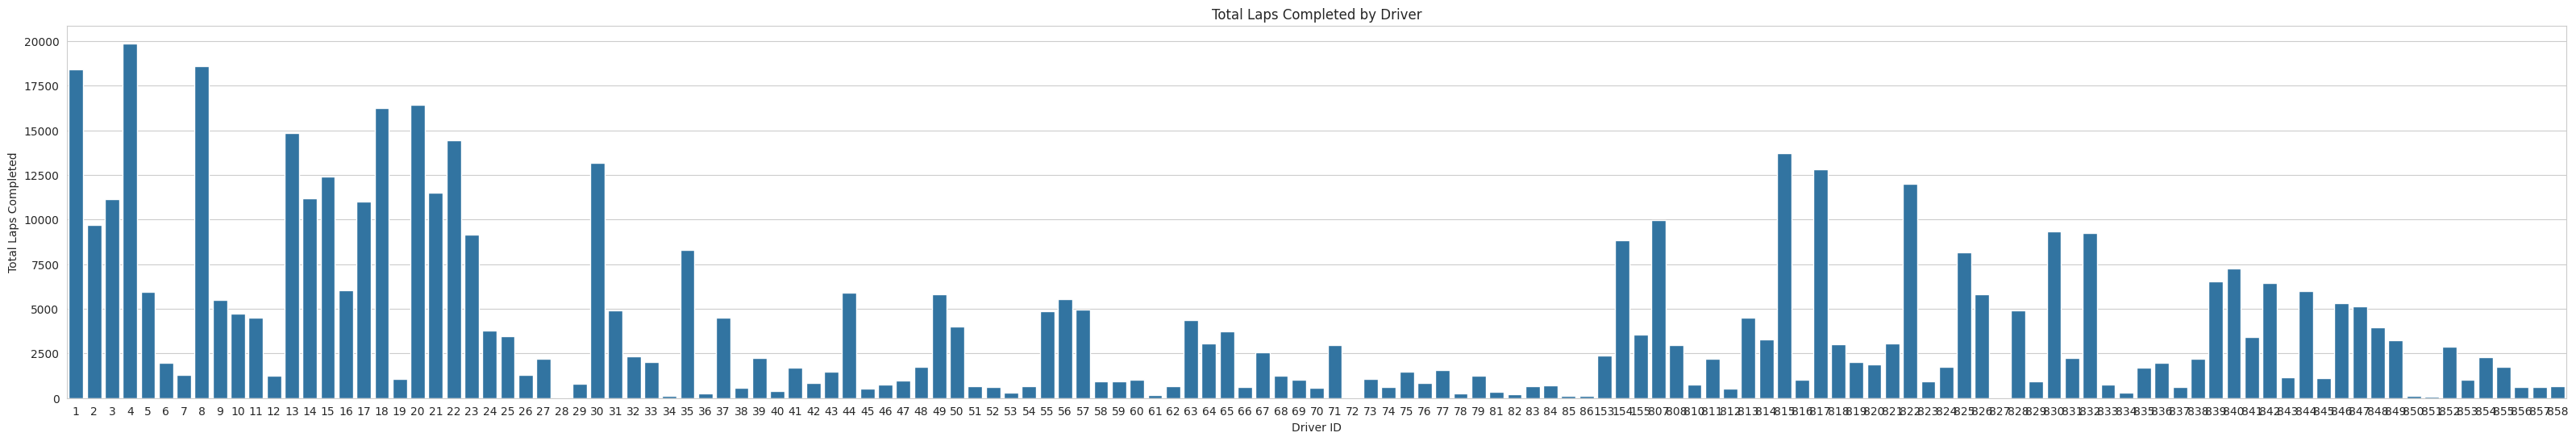

In [23]:
#Group by driverId and count the total number of laps completed by each driver
total_laps_per_driver = data.groupby('driverId')['lap'].count()

#Identify the driver with the most laps completed
most_laps_driver = total_laps_per_driver.idxmax()

#Display the driver with the most completed laps
print("Driver who has completed the most laps:", most_laps_driver)
print("Total laps completed by this driver:", total_laps_per_driver[most_laps_driver])

#Plot the total laps completed for each driver
plt.figure(figsize=(40, 6))
sns.barplot(x=total_laps_per_driver.index, y=total_laps_per_driver.values)
plt.title("Total Laps Completed by Driver")
plt.xlabel("Driver ID")
plt.ylabel("Total Laps Completed")
plt.show()

This graph shows that driver 4 has completed the most laps over the measured span of races, followed by driver 1 and driver 8. This means that these drivers have likely finished more races on than their competiton and have finished these many races because careers have been good enough to warrant that many laps completed. This would be in contrast to drivers that have very minimally sized bars in the graphs, which either shows the driver was a stand-in substitute for a full time driver or did not have a good enough career to warrant staying in the sport long. For the dirvers in the middle which have a fair number of laps completed but not as close to the leading trio, it could mean their car often has mechanical failures, their car is generally slow and falls off the lead lap during races, or the driver is crash-prone and retires from races often. This provides benefit in being part of solving the problem of how teams can make the car finish races as quickly as possible, as a driver must be able to finish in order to even do so quickly. A driver who is shown to be able to finish at least close to the most laps finished can be statistically trusted by the teams then, to carry out the stratgies, plans, and scenarios they create based on the lap times they set. Conversely, a driver who is prone to accidents on track would not provide this benefit because their crashing would render the strategies useless.

Overall, from the answers to these six questions, the graphs that were generated, and the insights that came along with them, it is clear that from a data analysis perspective that this data set on lap times during Formula One races from 2011 to 2023 is crucial, especially for teams' strategists, engineers, and drivers who are all pursuing the common goal of solving the problem of how quickly can they finish the races. Each column from the table was able to provide a perspective and meaning to certain performance metrics and the conclusions drawn from them. This results not only insights that detailed, but ties to the original problems and the benefits to its stake-holders that are deep, complex, and meaningful.

Formula One is a sport which can seem extremely complex to many, with technical rules, regulations, and implementations of data that can be extremely hard to follow or understand fully, so below are links that may be able to help one understand the sport better or understand the important connection between the sport and data analysis.

Additonal Resources:
https://www.formula1.com --> Official website of Formula One, has many articles and videos which explain rules and also do some dives into how technology and data on the cars works

https://www.fia.com/events/fia-formula-one-world-championship/season-2024/2024-fia-formula-one-world-championship --> Official governing body behind F1, has documents containing all of the rules and the technical and sporting regulations of the Formula One World Championship in full detail

https://www.f1-tempo.com --> Website containing millions of data points of Formula One, for one to analyze all the aspects of the data in full, from car speeds, trhottle and brake pedal traces, lap times, etc.

https://www.forbes.com/sites/joelshapiro/2023/01/26/data-driven-at-200-mph-how-analytics-transforms-formula-one-racing/?sh=6ed780c039db --> Article which does a dive into how data is vital to F1 teams' performances and operations

https://venturebeat.com/enterprise-analytics/a-lesson-from-formula-1-using-data-is-a-winning-strategy/ --> Another article which dives into data implementation and analysis in Formula One teams